In [1]:
# Surpress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
!pip install -U scikit-learn
# other libraries should be installed too if they're not 

     ---------------------------------------- 7.3/7.3 MB 22.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.1
    Uninstalling scikit-learn-1.1.1:
      Successfully uninstalled scikit-learn-1.1.1

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
file_name="kc_house_data_NaN.csv"
df=pd.read_csv(file_name)

In [5]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# Display the data types of each column using the function dtypes
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
# Drop the columns 'id', 'unnamed: 0' from axis 1 using method drop(), then use the method describe()
df.drop(['id', 'Unnamed: 0'], axis = 1, inplace=True)

In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
# Let's see the missing values in bedrooms and bathrooms
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [11]:
# We can replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms' using the method replace()
mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean,inplace=True)

In [12]:
# We also replace the missing values of column 'bathrooms'...
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean,inplace=True)

In [13]:
# Check if there is any NaN values left
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [14]:
# Exploratory Data Analysis
# Use the method value_counts to count the number of houses with unique floor values, use the method .to_fram() to conver it to a dataframe
df.describe(include=['float64'])

,price,bedrooms,bathrooms,floors,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,1.494309,47.560053,-122.213896
std,3.671272e+05,0.926378,0.768818,0.539989,0.138564,0.140828
min,7.500000e+04,1.000000,0.500000,1.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.750000,1.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.250000,1.500000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.500000,2.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,3.500000,47.777600,-121.315000


In [15]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

<AxesSubplot:xlabel='waterfront', ylabel='price'>

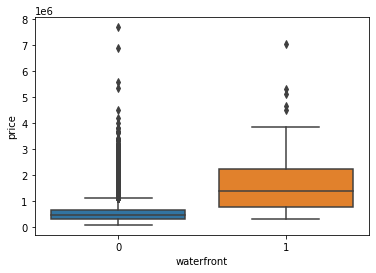

In [16]:
# Let's see whether houses with waterfront or without have more pirce outliers
sns.boxplot(x='waterfront', y='price', data=df)

(0.0, 10000000.0)

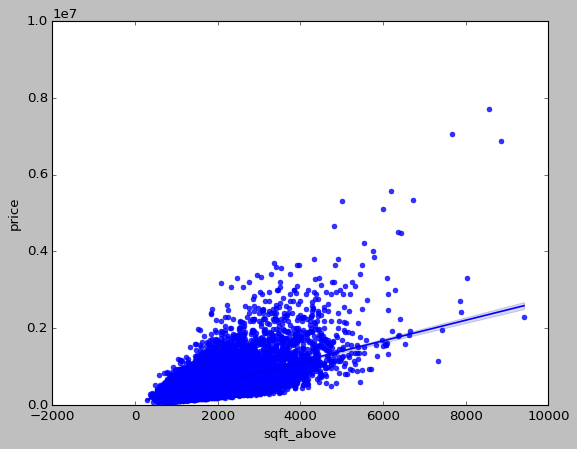

In [18]:
# Let's see if the feature sqft_above is negatively or positively correlated with price
plt.style.use(['classic']) # to see graph well in the dark mode; if you're not using dark mode this code is not required 
sns.regplot(x="sqft_above", y='price', data=df)
plt.ylim(0, )

In [19]:
# Use Pandas method corr() to find the feature other than price that is most correlated with price
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [20]:
# Let's fit linear regression model using the longitude feature 'long'and calculate R^2
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [21]:
#Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2.
X = df[['sqft_living']]
Y = df[['price']]
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)

0.4928532179037931

In [22]:
# Fit a linear regression model to predict the <code>'price'</code> using the list of features:
features = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]     
lm.fit(features, df['price'])

LinearRegression()

In [23]:
# Then calculate the R^2.
lm.score(features, Y)

0.6576372970735713

In [24]:
"""
Create a list of tuples, the first element in the tuple contains the name of the estimator:
'scale'
'polynomial'
'model'

The second element in the tuple contains the model constructor
StandardScaler()
PolynomialFeatures(include_bias=False)
LinearRegression()
"""

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [25]:
# Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2
# First, we normalize 'floors' to float
df[['floors']].astype(float)
lm.fit(features, df['price'])

LinearRegression()

In [26]:
# Input the list as an argument to the pipeline constructor
pipe = Pipeline(Input)
pipe.fit(features,Y)
ypipe = pipe.predict(features)
ypipe[0:4]

array([[351376.],
       [562952.],
       [450802.],
       [394754.]])

In [27]:
# multiple linear regression, find the R^2
lm.score(features, Y)

0.6576372970735713

In [28]:
# Now we can evaluate the model and refine
# import the necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [29]:
# We split the data into training and testing sets
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [30]:
# Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.
from sklearn.linear_model import Ridge
lre = LinearRegression() # Let's cross-validate
Rcross = cross_val_score(lre, X, Y, cv=4)
Rcross.mean() # calculate the mean R^2

0.6544554596228602

In [31]:
RidgeModel = Ridge(alpha=0.1) # Parameter is 0.1
RidgeModel.fit(x_train, y_train) # Fit the model
yhat = RidgeModel.predict(x_test) # Let's obtain a prediction
print('predicted: ', yhat[0:4])
print('test set: ', y_test[0:4].values)
RidgeModel.score(x_test, y_test) # Calculate R^2 using the test data

predicted:  [651781.17964158 514958.12791319 794388.65874944 702639.20038573]
test set:  [ 459000.  445000. 1057000.  732350.]


0.6478759163939114

In [32]:
# Perform a second order polynomial transform on both the training data and testing data.
# Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided.
from ipywidgets import interact, interactive, fixed, interact_manual # libraries for plotting
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2) # Perform a second order polynomial transformation
x_train_pr = pr.fit_transform(x_train[features])
x_test_pr = pr.fit_transform(x_test[features])
poly = LinearRegression() # Let's create a linear regression model "poly" and train it
poly.fit(x_train_pr, y_train)
yhat = poly.predict(x_test_pr) # Let's take the first five predicted vales and compare it to the actual targets
print("predicted values: ", yhat[0:4])
print("Actual values: ", y_test[0:4].values)
RidgeModel = Ridge(alpha=0.1) # Create a ridge regrssion object
RidgeModel.fit(x_train_pr, y_train) # Fit the model
RidgeModel.score(x_test_pr, y_test) # calculate R^2

predicted values:  [589029.12688065 451774.43596172 635276.55779934 701494.49200821]
Actual values:  [ 459000.  445000. 1057000.  732350.]


0.700274426566343